In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as st
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [122]:
sns.set(rc={'figure.figsize':(10,10)})

In [123]:
clean_final_df = pd.read_csv('D:/DO_NOT_REMOVE/Data_Analyst_Junior/7_11/Данные для кейса/funnel_info_3.csv')
clean_final_df.shape

(981498, 7)

In [124]:
clean_final_df.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,151184,interest,225688,0.0,iOS,search,1.5
1,720354,purchase,225495,50.0,Android,organic_traffic,0.0
2,947521,consideration,225482,0.0,Android,organic_traffic,0.0
3,1034498,intent,225430,0.0,iOS,search,1.5
4,929180,intent,224682,0.0,iOS,search,1.5


### Перекодировка значений таблицы, относящиеся к операционной системе и этапам воронки, в бинарный и нумерованный вид в зависимости от этапа соответственно.

In [125]:
clean_final_df.os.unique()

array(['iOS', 'Android'], dtype=object)

In [126]:
df_binary = clean_final_df.copy()

In [127]:
# Перекодировка информации об операционной системе в бинарный вид.
mapping = {'iOS': 0, 'Android': 1}
df_binary['os'] = df_binary['os'].map(mapping)
df_binary.shape

(981498, 7)

In [144]:
df_binary.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,151184,interest,225688,0.0,0,search,1.5
1,720354,purchase,225495,50.0,1,organic_traffic,0.0
2,947521,consideration,225482,0.0,1,organic_traffic,0.0
3,1034498,intent,225430,0.0,0,search,1.5
4,929180,intent,224682,0.0,0,search,1.5


In [145]:
# Перекодировка информации об этапах воронки в нумерованный вид в зависимости от этапа воронки.

Описание этапов воронки:

awareness — осведомлённость (факт показа рекламы); в нашей таблице этот этап воронки пропущен(!!!); 

interest — интерес (клик по рекламному баннеру и переход на сайт); 

consideration — рассмотрение к покупке (выбор планов подписки, хождение по продуктовым страницам); 

intent — намерение купить (выбор плана, заявка на обратную связь, регистрация); 

purchase — покупка.

In [146]:
df_binary.funnel_stage.unique()

array(['interest', 'purchase', 'consideration', 'intent'], dtype=object)

In [147]:
df_rec = df_binary.copy()

In [148]:
df_rec.head()

,user_id,funnel_stage,timestamp,profit,os,ad_channel,price
0,151184,interest,225688,0.0,0,search,1.5
1,720354,purchase,225495,50.0,1,organic_traffic,0.0
2,947521,consideration,225482,0.0,1,organic_traffic,0.0
3,1034498,intent,225430,0.0,0,search,1.5
4,929180,intent,224682,0.0,0,search,1.5


In [149]:
df_rec = pd.get_dummies(df_rec, columns=['funnel_stage'], prefix='funnel_stage')
df_rec.shape

(981498, 10)

In [150]:
df_rec.head()

,user_id,timestamp,profit,os,ad_channel,price,funnel_stage_consideration,funnel_stage_intent,funnel_stage_interest,funnel_stage_purchase
0,151184,225688,0.0,0,search,1.5,False,False,True,False
1,720354,225495,50.0,1,organic_traffic,0.0,False,False,False,True
2,947521,225482,0.0,1,organic_traffic,0.0,True,False,False,False
3,1034498,225430,0.0,0,search,1.5,False,True,False,False
4,929180,224682,0.0,0,search,1.5,False,True,False,False


### Примените метод factorize из библиотеки Pandas и посчитайте корреляции стандартным способом. Нарисуйте матрицу с помощью библиотеки Seaborn. Посчитайте корреляцию для цены и идентификатора пользователя с помощью коэффициента Пирсона.

In [135]:
df_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981498 entries, 0 to 981497
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     981498 non-null  int64  
 1   timestamp                   981498 non-null  int64  
 2   profit                      981498 non-null  float64
 3   os                          981498 non-null  int64  
 4   ad_channel                  981498 non-null  object 
 5   price                       981498 non-null  float64
 6   funnel_stage_consideration  981498 non-null  bool   
 7   funnel_stage_intent         981498 non-null  bool   
 8   funnel_stage_interest       981498 non-null  bool   
 9   funnel_stage_purchase       981498 non-null  bool   
dtypes: bool(4), float64(2), int64(3), object(1)
memory usage: 48.7+ MB


In [152]:
# Словарь для хранения ключей кодировки
label_mappings = {}

In [153]:
# Применение метода factorize к категориальным столбцам
for column in df_rec.select_dtypes(include=['object']).columns:
    df_rec[column], uniques = pd.factorize(df_rec[column])
    label_mappings[column] = dict(zip(uniques, range(len(uniques))))

In [154]:
# Печать ключей кодировки
print("\nLabel mappings:")
for column, mapping in label_mappings.items():
    print(f"{column}: {mapping}")


Label mappings:
ad_channel: {'search': 0, 'organic_traffic': 1, 'partner_network': 2, 'banner': 3, 'other': 4, 'rich': 5, 'native': 6, 'video': 7}


In [155]:
# Вычисление корреляции
correlation_matrix = df_rec.corr()

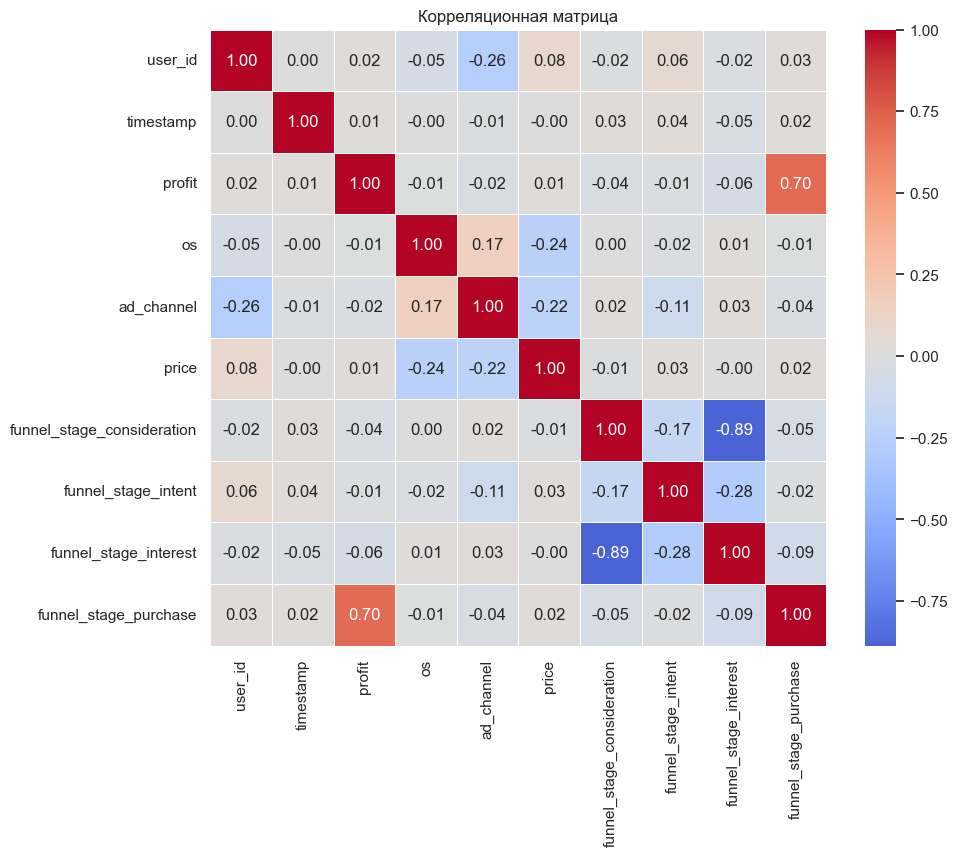

In [156]:
# Визуализация корреляционной матрицы с помощью Seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", center=0, square=True, linewidths=.5)
plt.title('Корреляционная матрица')
plt.show()

In [157]:
# Расчет корреляции между `price` и `user_id` с помощью коэффициента Пирсона
pearson_corr = df_rec['price'].corr(df_rec['user_id'], method='pearson')

print(f"Коэффициента Пирсона между 'price' и 'user_id': {pearson_corr}")

Коэффициента Пирсона между 'price' и 'user_id': 0.08440091488821405


Вывод: коэффициент до 0,1 — корреляция отсутствует либо слишком мала, чтобы считать её существенной;

### Воспользуйтесь методом LabelEncoder из библиотеки Sklearn и закодируйте значения рекламных каналов. Проведите факторный анализ, опираясь на информацию, полученную в модуле. Не забудьте применить метод factorize к колонкам вашей таблицы, прежде чем проводить тест Бартлетта.

In [158]:
df_rec_1 = df_rec.copy()

In [159]:
# Кодирование значений рекламных каналов с использованием LabelEncoder
le = LabelEncoder()
df_rec_1['ad_channel'] = le.fit_transform(df_rec_1['ad_channel'])

In [160]:
# Проведение теста Бартлетта
chi_square_value, p_value = calculate_bartlett_sphericity(df_rec_1)
print(f"Тест Бартлетта: Chi-Square Value = {chi_square_value}, p-value = {p_value}")

Тест Бартлетта: Chi-Square Value = 34373516.96106138, p-value = 0.0


In [161]:
# Проведение факторного анализа
n_factors=3
fa = FactorAnalyzer(n_factors, rotation='varimax')
fa.fit(df_rec_1)

FactorAnalyzer(rotation='varimax', rotation_kwargs={})

In [162]:
# Вывод факторных нагрузок
loadings = pd.DataFrame(fa.loadings_, index=df_rec_1.columns, columns=['factor_{x}'.format(x=x+1) for x in range(n_factors)])
print(f"Factor Loadings:\n{loadings}")

Factor Loadings:
                            factor_1  factor_2  factor_3
user_id                     0.007245  0.025426 -0.336053
timestamp                   0.040733  0.018017 -0.021758
profit                      0.030105  0.704178 -0.010861
os                         -0.002242 -0.000910  0.312702
ad_channel                 -0.014620 -0.025104  0.609696
price                      -0.003681  0.008691 -0.380742
funnel_stage_consideration  0.871592 -0.085112  0.100306
funnel_stage_intent         0.079698 -0.005544 -0.190045
funnel_stage_interest      -1.009340 -0.038674  0.067403
funnel_stage_purchase       0.042719  0.996553 -0.017219


In [163]:
loadings.sort_values(by='factor_1', ascending=False)

,factor_1,factor_2,factor_3
funnel_stage_consideration,0.871592,-0.085112,0.100306
funnel_stage_intent,0.079698,-0.005544,-0.190045
funnel_stage_purchase,0.042719,0.996553,-0.017219
timestamp,0.040733,0.018017,-0.021758
profit,0.030105,0.704178,-0.010861
user_id,0.007245,0.025426,-0.336053
os,-0.002242,-0.000910,0.312702
price,-0.003681,0.008691,-0.380742
ad_channel,-0.014620,-0.025104,0.609696
funnel_stage_interest,-1.009340,-0.038674,0.067403


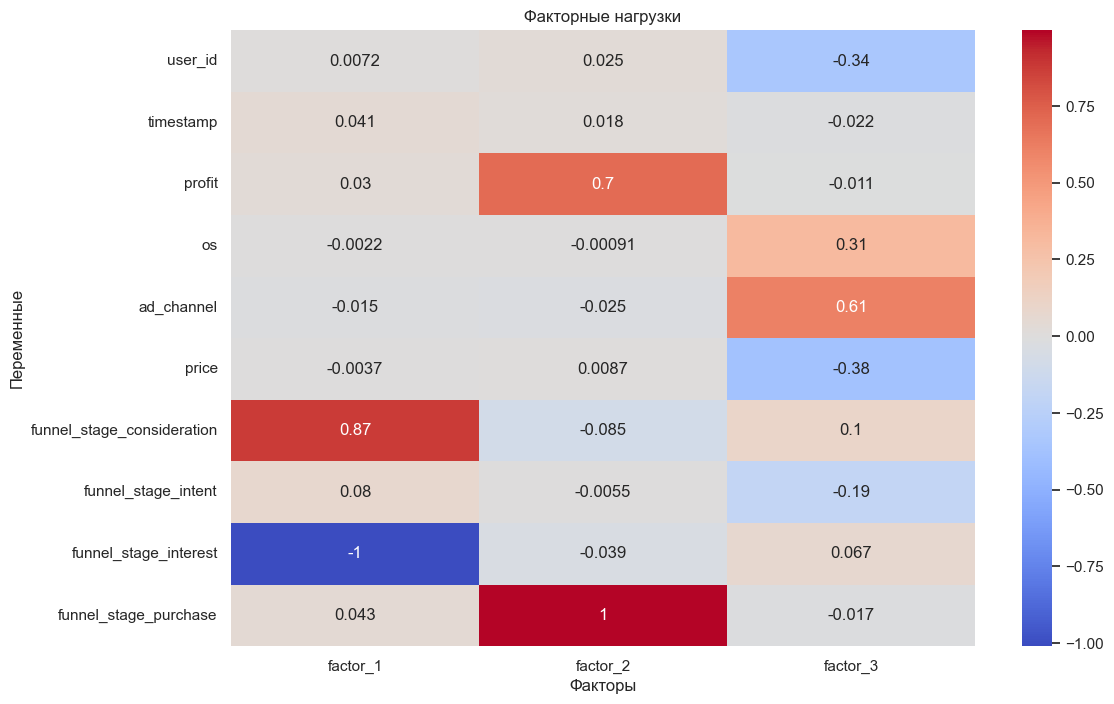

In [164]:
# Визуализация факторных нагрузок
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm')
plt.title('Факторные нагрузки')
plt.xlabel('Факторы')
plt.ylabel('Переменные')
plt.show()

### Выводы на основе полученных результатов

Интерпретация факторных нагрузок.
Факторные нагрузки показывают, насколько каждая переменная коррелирует с каждым фактором. Чем выше значение (по абсолютной величине), тем сильнее корреляция.

Фактор 1

Переменные, связанные с первым фактором:

funnel_stage_consideration (0.871592): Высокая положительная нагрузка.

funnel_stage_interest (-1.009340): Высокая отрицательная нагрузка.

Этот фактор можно интерпретировать как "Этап рассмотрения и интереса". Переменные, связанные с этапами воронки продаж, имеют сильные нагрузки. В частности, стадия рассмотрения имеет положительную связь, в то время как стадия интереса имеет сильную отрицательную связь. Это может указывать на обратную зависимость между этими двумя стадиями.

Фактор 2

Переменные, связанные со вторым фактором:

profit (0.704178): Высокая положительная нагрузка.
    
funnel_stage_purchase (0.996553): Очень высокая положительная нагрузка.
    
Этот фактор можно интерпретировать как "Прибыль и покупка". Этот фактор явно связан с переменными, которые напрямую влияют на покупку и прибыль. Высокая нагрузка на profit и особенно высокая нагрузка на funnel_stage_purchase указывают на сильную положительную зависимость между этими переменными.

Фактор 3

Переменные, связанные с третьим фактором:

ad_channel (0.609696): Высокая положительная нагрузка.
    
os (0.312702): Умеренная положительная нагрузка.
    
price (-0.380742): Умеренная отрицательная нагрузка.
    
Этот фактор можно интерпретировать как "Рекламный канал, ОС и цена". Положительная нагрузка на ad_channel и os указывает на их взаимосвязь с этим фактором, в то время как отрицательная нагрузка на price может указывать на обратную зависимость.

Выводы и рекомендации

Этапы воронки продаж:

Фактор 1 показывает, что стадии "рассмотрение" и "интерес" сильно связаны между собой, но в обратном направлении. Это может означать, что пользователи, которые уже заинтересованы, не находятся на стадии рассмотрения, и наоборот.

Прибыль и покупка:

Фактор 2 указывает на прямую зависимость между этапом "покупка" и прибылью. Это логично, поскольку успешные покупки приводят к увеличению прибыли.

Рекламный канал, ОС и цена:

Фактор 3 показывает, что рекламный канал и операционная система связаны между собой и с фактором, который также включает цену. Обратная зависимость с ценой может указывать на то, что различные каналы рекламы и ОС могут по-разному влиять на восприятие цены.

In [167]:
df_rec_1.head()

,user_id,timestamp,profit,os,ad_channel,price,funnel_stage_consideration,funnel_stage_intent,funnel_stage_interest,funnel_stage_purchase
0,151184,225688,0.0,0,0,1.5,False,False,True,False
1,720354,225495,50.0,1,1,0.0,False,False,False,True
2,947521,225482,0.0,1,1,0.0,True,False,False,False
3,1034498,225430,0.0,0,0,1.5,False,True,False,False
4,929180,224682,0.0,0,0,1.5,False,True,False,False


In [168]:
# Сохранить новый DataFrame в файл CSV
df_rec_1.to_csv('D:/DO_NOT_REMOVE/Data_Analyst_Junior/7_11/Данные для кейса/funnel_info_4.csv', index=False) 